In [ ]:
install.packages("ggplot2")   # For advanced plotting
install.packages("dplyr")     # For data manipulation
install.packages("tidyr")     # For tidying data
install.packages("summarytools") # For summary statistics
install.packages("corrplot")   # For correlation plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lobstr’, ‘plyr’, ‘reshape2’, ‘checkmate’, ‘magick’, ‘matrixStats’, ‘pander’, ‘pryr’, ‘rapportools’


Warning message in install.packages("summarytools"):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("summarytools"):
“installation of package ‘summarytools’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data <- read.csv("/content/weight-height.csv")

In [ ]:
# Before visualizing, you should briefly describe your dataset's key characteristics:

# Number of features/variables: Typically mention how many columns

# Data types: Identify numeric (continuous/discrete), categorical, datetime, etc.

# Missing values: Report any NA/null values and their distribution

# Anomalies: Note any outliers or unexpected values

# Example description:
# "The dataset contains 10,000 observations with 8 features (5 numeric, 3 categorical). There are 120 missing values (1.2%) concentrated in two columns. Initial analysis revealed 15 extreme outliers in the 'price' variable."

In [ ]:
str(data)             # Shows the structure of the dataset
summary(data)         # Displays summary statistics (mean, min, max, etc.)
head(data)

'data.frame':	10000 obs. of  3 variables:
 $ Gender: chr  "Male" "Male" "Male" "Male" ...
 $ Height: num  73.8 68.8 74.1 71.7 69.9 ...
 $ Weight: num  242 162 213 220 206 ...


    Gender              Height          Weight     
 Length:10000       Min.   :54.26   Min.   : 64.7  
 Class :character   1st Qu.:63.51   1st Qu.:135.8  
 Mode  :character   Median :66.32   Median :161.2  
                    Mean   :66.37   Mean   :161.4  
                    3rd Qu.:69.17   3rd Qu.:187.2  
                    Max.   :79.00   Max.   :270.0  

,Gender,Height,Weight
,<chr>,<dbl>,<dbl>
1,Male,73.84702,241.8936
2,Male,68.78190,162.3105
3,Male,74.11011,212.7409
4,Male,71.73098,220.0425
5,Male,69.88180,206.3498
6,Male,67.25302,152.2122


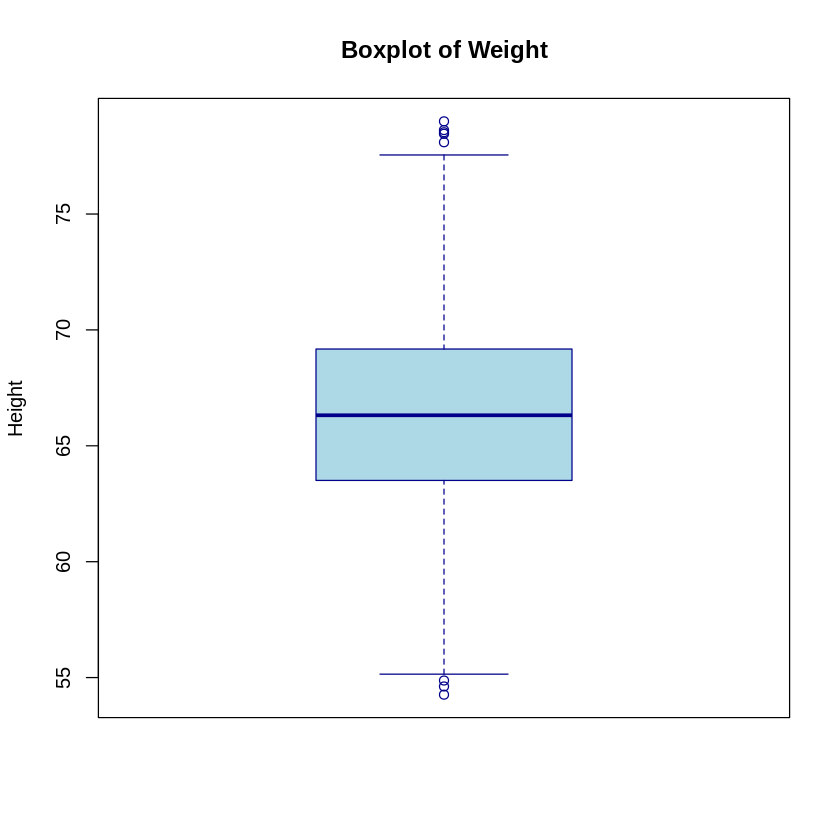

In [ ]:
boxplot(data$Height,
        main = "Boxplot of Weight",
        ylab = "Height",
        col = "lightblue",
        border = "darkblue")

In [ ]:
# A boxplot (or "box-and-whisker plot") is a standardized way to display
#  the distribution of data based on a five-number summary: minimum, first quartile (Q1),
#   median (Q2), third quartile (Q3), and maximum.
#  It's particularly useful for comparing distributions across different groups and identifying outliers.

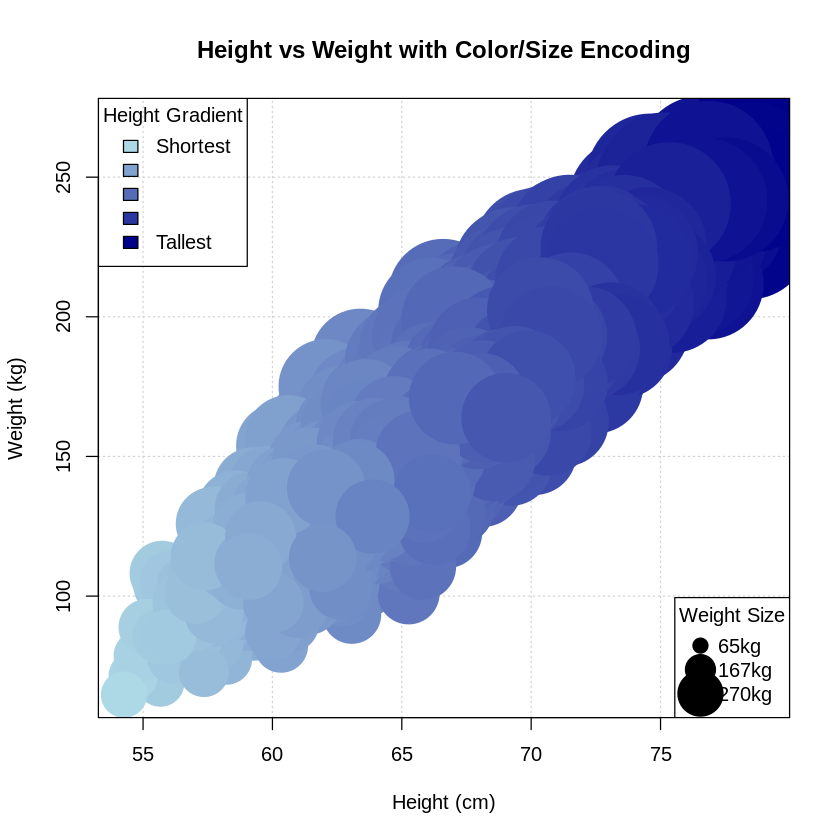

In [ ]:
# Create color gradient based on Height values
height_colors <- colorRampPalette(c("lightblue", "darkblue"))(length(data$Height))
data$height_color <- height_colors[cut(data$Height, breaks = length(height_colors))]

# Create size scaling based on Weight values
weight_sizes <- scales::rescale(data$Weight, to = c(5, 15))  # Scale to point sizes

# Create scatterplot
plot(data$Height, data$Weight,
     xlab = "Height (cm)",
     ylab = "Weight (kg)",
     main = "Height vs Weight with Color/Size Encoding",
     pch = 19,  # Solid circles
     col = data$height_color,
     cex = weight_sizes,  # Point size based on weight
     panel.first = grid()
)

# Add legend for color (Height)
legend("topleft",
       legend = c("Shortest", "", "", "", "Tallest"),
       fill = colorRampPalette(c("lightblue", "darkblue"))(5),
       title = "Height Gradient")

# Add legend for size (Weight)
legend("bottomright",
       legend = paste0(round(seq(min(data$Weight), max(data$Weight), length.out = 3)), "kg"),
       pt.cex = scales::rescale(seq(min(data$Weight), max(data$Weight), length.out = 3),
       to = c(5, 15))/3,
       pch = 19,
       title = "Weight Size")

# Add labels for each point
text(data$Height, data$Weight,
     labels = data$Person,
     pos = 4,  # Position text to the right of points
     cex = 0.8)

In [ ]:
# Scatterplots are fundamental visualization tools in R for examining relationships between two continuous variables.
# They plot individual data points on an x-y coordinate system to reveal patterns, trends, and correlations.
# Key Components
# Points: Represent individual observations

# X-axis: Independent/predictor variable

# Y-axis: Dependent/response variable

# Point attributes: Can encode additional information through:

# Color (categorical or continuous)

# Size (continuous variables)

# Shape (categorical variables)

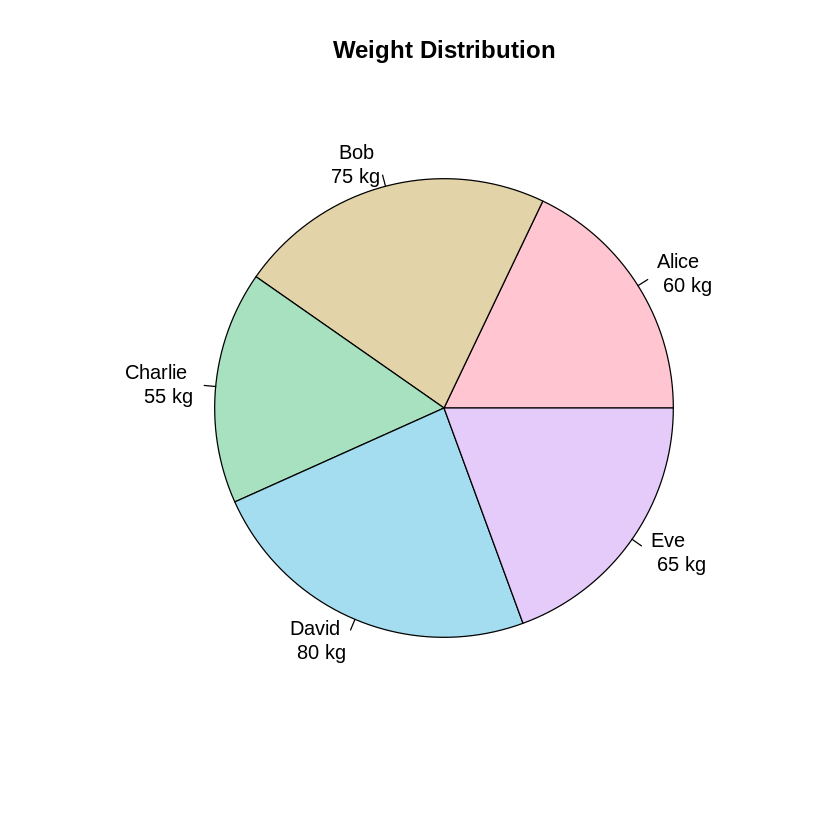

In [ ]:
# Sample data
data <- data.frame(
  Person = c("Alice", "Bob", "Charlie", "David", "Eve"),
  Weight = c(60, 75, 55, 80, 65)  # in kg
)

# Simple pie chart
pie(data$Weight,
    labels = paste(data$Person, "\n", data$Weight, "kg"),
    main = "Weight Distribution",
    col = hcl.colors(nrow(data), "Pastel1"))




ERROR: Error in hist.default(data$Height, main = "histogram of Height", xlab = "Height", : 'x' must be numeric
